In [ ]:
!pip install yt-dlp  # YouTube downloader
!pip install git+https://github.com/openai/whisper.git  # Whisper for transcription
!apt update && apt install -y ffmpeg  # FFmpeg for audio conversion
!pip install transformers  # AI models for summarization, quiz generation, and translation

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-mdo7h8bs
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-mdo7h8bs
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://

In [ ]:
!pip install yt-dlp openai-whisper ffmpeg

In [ ]:
import yt_dlp
import whisper
import os

# Load Whisper model (choose "small", "medium", or "large" depending on accuracy needs)
model = whisper.load_model("medium")

# List of YouTube video URLs
#video_urls = [
  #  "https://youtu.be/lZ3bPUKo5zc?si=e0L00XDiyBpXkkHj",
  #  "https://youtu.be/jGwO_UgTS7I?si=_KS1_K8pY6FSZuzW",
  #  "https://youtu.be/D1RzvXDXyqA?si=la0RldWCViOFQr3O",
  #  "https://youtu.be/3stTozERusk?si=zmrLoLV1pFW_JZPo",
   # "https://youtu.be/P-medYaqVak?si=s6Yt77j96dgdBbGy",
   # "https://youtu.be/0JUN9aDxVmI?si=Ql1BQ3gNZ5iTqvJo",
   # "https://youtu.be/MhPyfvAxjEg?si=gnNKvWq1yPVCe9v6",
   # "https://youtu.be/zrT2qETJilw?si=ym6ODcYSN5-utxX3",
   # "https://youtu.be/VWamhZ8vTL4?si=AxVHjkZT4f9pS01T",
   # "https://youtu.be/x2t6sUjL0T4?si=ZsR9ADA5p31JWjM0"

#]

video_urls = [
    "https://youtu.be/VWamhZ8vTL4?si=H7_7vKWNdSIIzxdf",
    "https://youtu.be/TKNqIU5P3As?si=GXIYQgNVg6ZgWH7x",
    "https://youtu.be/qnEZQRpWWi8?si=kIs6r2-W2irKtMbp",
    "https://youtu.be/FRd28CLvMQM?si=1tBr6NkHsUE9r3po",
    "https://youtu.be/nEWNNt2KmfQ?si=aqUZ5XAq6S41_jKq",
    "https://youtu.be/kiuwtaprFjk?si=S9On7irWIWN4cQKP",
    "https://youtu.be/RBSUwFGa6Fk?si=7t9YmpZuUum00-Y0",
    "https://youtu.be/_58RKPXiORA?si=KBfeQjPjabQsXE_2",
    "https://youtu.be/d5zH2RdR1qQ?si=cuk5mVMjUzspYyso",
    "https://youtu.be/3vy__KvTi6I?si=pkJa-y1pYrLVnStc"

]

# Dictionary to store transcripts
transcripts_dict = {}

# Function to process multiple videos
def process_videos(video_urls):
    for url in video_urls:
        print(f"🔄 Processing: {url}")

        # yt-dlp options to extract audio URL (without downloading)
        ydl_opts = {
            'format': 'bestaudio',
            'quiet': True,
            'noplaylist': True,
        }

        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(url, download=False)  # Get video info without downloading
            audio_url = info.get('url')  # Extract direct audio URL
            video_id = info.get('id')  # Get video ID

        print(f"🎙️ Streaming audio for transcription: {video_id}")

        # Transcribe directly from the streamed audio
        result = model.transcribe(audio_url)

        # Store transcript in dictionary
        transcripts_dict[video_id] = result["text"]

        print(f"✅ Transcription completed for {video_id}\n")

# Run the function to process multiple videos
process_videos(video_urls)

# Print example transcript
print(transcripts_dict)

/usr/local/lib/python3.11/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)


🔄 Processing: https://youtu.be/VWamhZ8vTL4?si=H7_7vKWNdSIIzxdf
🎙️ Streaming audio for transcription: VWamhZ8vTL4


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for VWamhZ8vTL4

🔄 Processing: https://youtu.be/TKNqIU5P3As?si=GXIYQgNVg6ZgWH7x
🎙️ Streaming audio for transcription: TKNqIU5P3As


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for TKNqIU5P3As

🔄 Processing: https://youtu.be/qnEZQRpWWi8?si=kIs6r2-W2irKtMbp
🎙️ Streaming audio for transcription: qnEZQRpWWi8


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for qnEZQRpWWi8

🔄 Processing: https://youtu.be/FRd28CLvMQM?si=1tBr6NkHsUE9r3po
🎙️ Streaming audio for transcription: FRd28CLvMQM


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for FRd28CLvMQM

🔄 Processing: https://youtu.be/nEWNNt2KmfQ?si=aqUZ5XAq6S41_jKq
🎙️ Streaming audio for transcription: nEWNNt2KmfQ


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for nEWNNt2KmfQ

🔄 Processing: https://youtu.be/kiuwtaprFjk?si=S9On7irWIWN4cQKP
🎙️ Streaming audio for transcription: kiuwtaprFjk


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for kiuwtaprFjk

🔄 Processing: https://youtu.be/RBSUwFGa6Fk?si=7t9YmpZuUum00-Y0
🎙️ Streaming audio for transcription: RBSUwFGa6Fk


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for RBSUwFGa6Fk

🔄 Processing: https://youtu.be/_58RKPXiORA?si=KBfeQjPjabQsXE_2
🎙️ Streaming audio for transcription: _58RKPXiORA


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for _58RKPXiORA

🔄 Processing: https://youtu.be/d5zH2RdR1qQ?si=cuk5mVMjUzspYyso
🎙️ Streaming audio for transcription: d5zH2RdR1qQ


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for d5zH2RdR1qQ

🔄 Processing: https://youtu.be/3vy__KvTi6I?si=pkJa-y1pYrLVnStc
🎙️ Streaming audio for transcription: 3vy__KvTi6I


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Transcription completed for 3vy__KvTi6I

{'VWamhZ8vTL4': " Wel, roeddwn i'n fawr i'r fideo hwn i'w gydweithio'r lles. Mae'r lles yn organ musgol holomusgol ymlaen yn y cavitau thoracig. Mae angen ni ddysgu'r anetomigol bach a'r anetomigol bach yn y lles i ddod yn fawr. Felly mae hynny'n rhan o ddysgu'r anetomiad bach i'w cyfrifio. Yn anetomigol, yn oed yn oed yn edrych ar unrhyw un o'r un. Felly mae'n fel bod yn edrych ar fy chym. Felly dyma fy lles yma. Felly rydym yn dweud ymlaen ar y lles ymlaen a'r lles ymlaen. Felly nid ydym yn mynd i'r ffwrdd. Rydw i'n dechrau'r ffurfio'r chym. Gallwch chi ddysgu'r ffurfio'r holl ffurfio a chymryd eich hun. Felly dyma'r ffurfio'r holl ffurfio'n ymlaen. Ac mae'r ffurfio'r holl ffurfio'n cael ei ddod yn y lles. Felly mae gennym ffurfio'r lles ar y lles yma a'r lles ymlaen ar y lles ymlaen. A'r lles lles arall yn cael ei ddod yn ffwrdd. Felly dyma'r ffurfio'r lles ymlaen o'r lles ymlaen. Ac wrth gwrs, mae'r lles ymlaen arall yn cael ei ddod yn ffw

In [ ]:
!pip install textblob pandas wordcloud nltk matplotlib seaborn
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd

# Convert transcripts into a DataFrame
df = pd.DataFrame(list(transcripts_dict.items()), columns=["Video_ID", "Transcript"])

# Display the first few rows
df.head()


,Video_ID,Transcript
0,VWamhZ8vTL4,"Wel, roeddwn i'n fawr i'r fideo hwn i'w gydwe..."
1,TKNqIU5P3As,"Hi, I'm Professor Akshar at Glendale Communit..."
2,qnEZQRpWWi8,"Alright folks, welcome to a semester in econo..."
3,FRd28CLvMQM,"In our last lecture, we saw that the theoreti..."
4,nEWNNt2KmfQ,"Hi, in this module, I'm going to cover the ba..."


In [ ]:
!pip install symspellpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt -O frequency_dictionary_en_82_765.txt


--2025-02-28 13:24:33--  https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332881 (1.3M) [text/plain]
Saving to: ‘frequency_dictionary_en_82_765.txt’

frequency_dictionar 100%[===================>]   1.27M  --.-KB/s    in 0.07s   

2025-02-28 13:24:33 (19.3 MB/s) - ‘frequency_dictionary_en_82_765.txt’ saved [1332881/1332881]



In [ ]:
import pandas as pd
import re
from symspellpy import SymSpell, Verbosity

# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load the downloaded dictionary file
dictionary_path = "frequency_dictionary_en_82_765.txt"  # Ensure this matches the downloaded file name
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)


# Function to correct spelling errors using SymSpell
def correct_spelling(text):
    words = text.split()  # Split text into words
    corrected_words = []
    for word in words:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        corrected_words.append(suggestions[0].term if suggestions else word)  # Choose best suggestion
    return " ".join(corrected_words)  # Rejoin words

# Apply spell correction to transcripts
df["Corrected_Transcript"] = df["Transcript"].apply(correct_spelling)

# Display corrected transcripts
from IPython.display import display
display(df[["Video_ID", "Corrected_Transcript"]])


,Video_ID,Corrected_Transcript
0,VWamhZ8vTL4,help redden in far i'm video own i'm gydweithi...
1,TKNqIU5P3As,in i'm professor Akshar at glendale community ...
2,qnEZQRpWWi8,alright folks welcome to a semester in economi...
3,FRd28CLvMQM,in our last lecture we saw that ﻿the theoretic...
4,nEWNNt2KmfQ,in in this module i'm going to cover ﻿the basi...
5,kiuwtaprFjk,"to here is something funny you might say OK, w..."
6,RBSUwFGa6Fk,let's talk about data science and some of ﻿the...
7,_58RKPXiORA,there are two ways by which energy is capable ...
8,d5zH2RdR1qQ,let's briefly review lewis structures now and ...
9,3vy__KvTi6I,biochemistry is ﻿the study of ﻿the chemistry o...


In [ ]:
import pandas as pd
from textblob import TextBlob
import re

# Convert transcripts into a DataFrame
#df = pd.DataFrame(list(transcripts_dict.items()), columns=["Video_ID", "Transcript"])

# Function to count spelling errors in a transcript
def count_spelling_errors(text):
    words = re.findall(r'\b\w+\b', text)  # Extract words
    incorrect_count = 0
    for word in words:
        corrected_word = TextBlob(word).correct()
        if corrected_word != word:  # If corrected word is different, it's a mistake
            incorrect_count += 1
    return incorrect_count, len(words), (incorrect_count / len(words)) * 100  # Return count, total words, and error %

# Apply the function to each transcript
df["Errors"], df["Total_Words"], df["Error_Percentage"] = zip(*df["Transcript"].apply(count_spelling_errors))

# Display results
from IPython.display import display
display(df)


,Video_ID,Transcript,Errors,Total_Words,Error_Percentage,Corrected_Transcript
0,VWamhZ8vTL4,"Wel, roeddwn i'n fawr i'r fideo hwn i'w gydwe...",1288,2574,50.038850,help redden in far i'm video own i'm gydweithi...
1,TKNqIU5P3As,"Hi, I'm Professor Akshar at Glendale Communit...",186,2977,6.247901,in i'm professor Akshar at glendale community ...
2,qnEZQRpWWi8,"Alright folks, welcome to a semester in econo...",125,2656,4.706325,alright folks welcome to a semester in economi...
3,FRd28CLvMQM,"In our last lecture, we saw that the theoreti...",144,3558,4.047218,in our last lecture we saw that ﻿the theoretic...
4,nEWNNt2KmfQ,"Hi, in this module, I'm going to cover the ba...",286,3454,8.280255,in in this module i'm going to cover ﻿the basi...
5,kiuwtaprFjk,"So here is something funny. You might say, OK...",65,1166,5.574614,"to here is something funny you might say OK, w..."
6,RBSUwFGa6Fk,Let's talk about data science and some of the...,57,1016,5.610236,let's talk about data science and some of ﻿the...
7,_58RKPXiORA,There are two ways by which energy is capable...,55,809,6.798517,there are two ways by which energy is capable ...
8,d5zH2RdR1qQ,Let's briefly review Lewis structures now and...,133,1808,7.356195,let's briefly review lewis structures now and ...
9,3vy__KvTi6I,Biochemistry is the study of the chemistry of...,113,2262,4.995579,biochemistry is ﻿the study of ﻿the chemistry o...


In [ ]:
!pip install pandas matplotlib seaborn plotly


In [ ]:
import pandas as pd
import plotly.express as px


# Create an interactive bar chart using Plotly
fig = px.bar(
    df,
    x="Video_ID",
    y="Errors",
    text="Errors",
    title="Spelling Errors in YouTube Transcripts",
    labels={"Errors": "Number of Spelling Errors", "Video_ID": "Video ID"},
    color="Errors",  # Color based on the number of errors
    color_continuous_scale="viridis"  # Color-blind-friendly palette
)

# Customize hover and layout
fig.update_traces(texttemplate='%{text}', textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor="rgba(0,0,0,0)",  # Transparent background
    title_font_size=18
)

# Show the interactive plot
fig.show()


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd

# Load the pre-trained NLP model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extract entity text and type
    return entities

# Apply NER to each corrected transcript
df["Named_Entities"] = df["Corrected_Transcript"].apply(extract_named_entities)

# Display results
from IPython.display import display
display(df)

,Video_ID,Transcript,Errors,Total_Words,Error_Percentage,Corrected_Transcript,Named_Entities
0,VWamhZ8vTL4,"Wel, roeddwn i'n fawr i'r fideo hwn i'w gydwe...",1288,2574,50.038850,help redden in far i'm video own i'm gydweithi...,"[(Mae'r, NORP), (ddysgu'r, GPE), (bach air, PE..."
1,TKNqIU5P3As,"Hi, I'm Professor Akshar at Glendale Communit...",186,2977,6.247901,in i'm professor Akshar at glendale community ...,"[(Akshar, PERSON), (glendale community college..."
2,qnEZQRpWWi8,"Alright folks, welcome to a semester in econo...",125,2656,4.706325,alright folks welcome to a semester in economi...,"[(first, ORDINAL), (four, CARDINAL), (just a f..."
3,FRd28CLvMQM,"In our last lecture, we saw that the theoreti...",144,3558,4.047218,in our last lecture we saw that ﻿the theoretic...,"[(maxwell, ORG), (hertz, ORG), (a couple of de..."
4,nEWNNt2KmfQ,"Hi, in this module, I'm going to cover the ba...",286,3454,8.280255,in in this module i'm going to cover ﻿the basi...,"[(linear, ORG), (linear, ORG), (january st 180..."
5,kiuwtaprFjk,"So here is something funny. You might say, OK...",65,1166,5.574614,"to here is something funny you might say OK, w...","[(linear, ORG), (linear, ORG), (two, CARDINAL)..."
6,RBSUwFGa6Fk,Let's talk about data science and some of the...,57,1016,5.610236,let's talk about data science and some of ﻿the...,"[(noisy data, ORG), (three, CARDINAL), (three,..."
7,_58RKPXiORA,There are two ways by which energy is capable...,55,809,6.798517,there are two ways by which energy is capable ...,"[(two, CARDINAL), (one, CARDINAL), (two, CARDI..."
8,d5zH2RdR1qQ,Let's briefly review Lewis structures now and...,133,1808,7.356195,let's briefly review lewis structures now and ...,"[(first, ORDINAL), (three, CARDINAL), (NO2, NO..."
9,3vy__KvTi6I,Biochemistry is the study of the chemistry of...,113,2262,4.995579,biochemistry is ﻿the study of ﻿the chemistry o...,"[(first, ORDINAL), (one, CARDINAL), (three, CA..."


In [ ]:
entity_data = []

# Extract entities for each transcript
for index, row in df.iterrows():
    for entity, entity_type in row["Named_Entities"]:
        entity_data.append({"Video_ID": row["Video_ID"], "Entity": entity, "Entity_Type": entity_type})

# Create a new DataFrame
entity_df = pd.DataFrame(entity_data)

# Display the structured DataFrame
from IPython.display import display
display(entity_df)


,Video_ID,Entity,Entity_Type
0,VWamhZ8vTL4,Mae'r,NORP
1,VWamhZ8vTL4,ddysgu'r,GPE
2,VWamhZ8vTL4,bach air,PERSON
3,VWamhZ8vTL4,kelly,PERSON
4,VWamhZ8vTL4,kelly,PERSON
...,...,...,...
623,3vy__KvTi6I,20,DATE
624,3vy__KvTi6I,21,DATE
625,3vy__KvTi6I,22,DATE
626,3vy__KvTi6I,two,CARDINAL


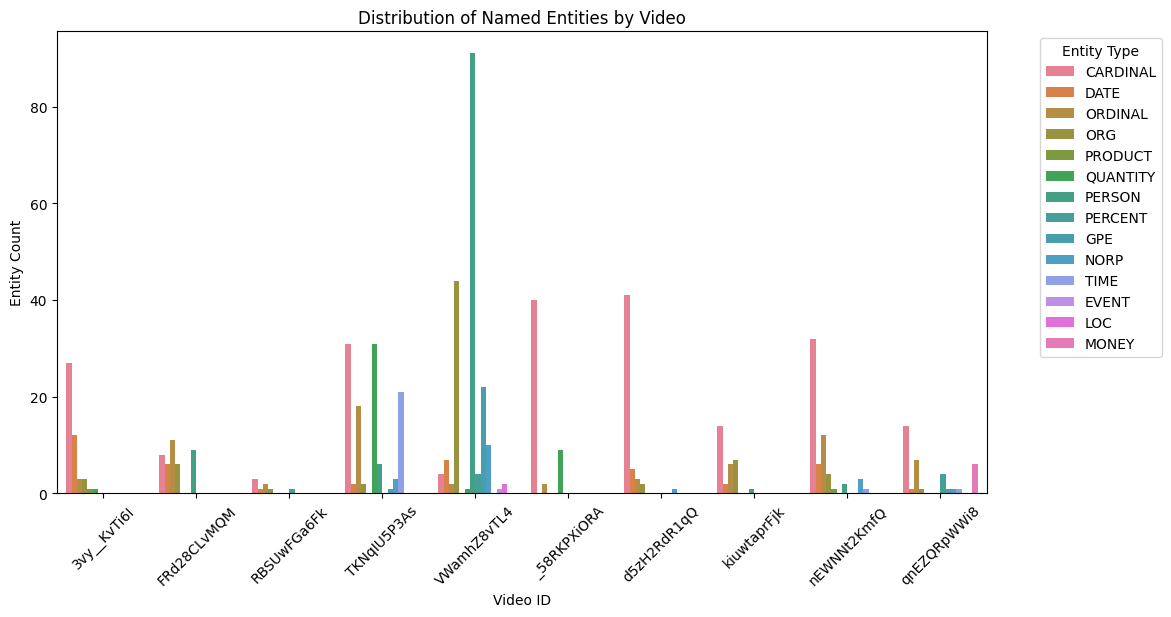

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Count occurrences of each entity type per Video_ID
entity_counts_per_video = entity_df.groupby(["Video_ID", "Entity_Type"]).size().reset_index(name="Count")

# Plot entity distribution per video using a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Video_ID", y="Count", hue="Entity_Type", data=entity_counts_per_video)

# Labels and title
plt.xlabel("Video ID")
plt.ylabel("Entity Count")
plt.title("Distribution of Named Entities by Video")
plt.xticks(rotation=45)
plt.legend(title="Entity Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px


# Create an interactive bar chart using Plotly
fig = px.bar(
    entity_counts_per_video,
    x="Video_ID",
    y="Count",
    color="Entity_Type",
    text="Count",
    title="Interactive Distribution of Named Entities by Video",
    labels={"Count": "Number of Entities", "Video_ID": "Video ID"},
    color_discrete_sequence=px.colors.qualitative.Safe  # Color-blind-friendly palette
)

# Customize hover and layout
fig.update_traces(texttemplate='%{text}', textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor="rgba(0,0,0,0)",  # Transparent background
    title_font_size=18,
    legend_title_text="Entity Type"
)

# Show the interactive plot
fig.show()


In [ ]:
from collections import Counter
import re

# Function to count word frequency
def word_frequency(text):
    words = re.findall(r'\b\w+\b', text.lower())  # Extract words
    return Counter(words).most_common(10)  # Return top 10 words

# Apply word frequency analysis to transcripts
df["Word_Frequency"] = df["Corrected_Transcript"].apply(word_frequency)

# Display results
df[["Video_ID", "Word_Frequency"]].head()


,Video_ID,Word_Frequency
0,VWamhZ8vTL4,"[(in, 222), (a, 192), (dded, 69), (r, 68), (ma..."
1,TKNqIU5P3As,"[(the, 169), (a, 111), (of, 108), (to, 105), (..."
2,qnEZQRpWWi8,"[(to, 135), (that, 110), (a, 71), (of, 71), (a..."
3,FRd28CLvMQM,"[(the, 222), (of, 158), (a, 123), (to, 115), (..."
4,nEWNNt2KmfQ,"[(the, 220), (to, 207), (of, 175), (and, 135),..."
